In [513]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy import stats

In [514]:
# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [515]:
train_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [516]:
test_df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [517]:
train_df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [518]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [519]:
train_df.isna().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [520]:
# Define X and y (features and target)
X = train_df.drop(['medv'],axis = 1 )
y = train_df['medv']
X

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [521]:
y

0      24.0
1      21.6
2      33.4
3      36.2
4      22.9
       ... 
328    17.5
329    22.4
330    20.6
331    23.9
332    11.9
Name: medv, Length: 333, dtype: float64

In [522]:
# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

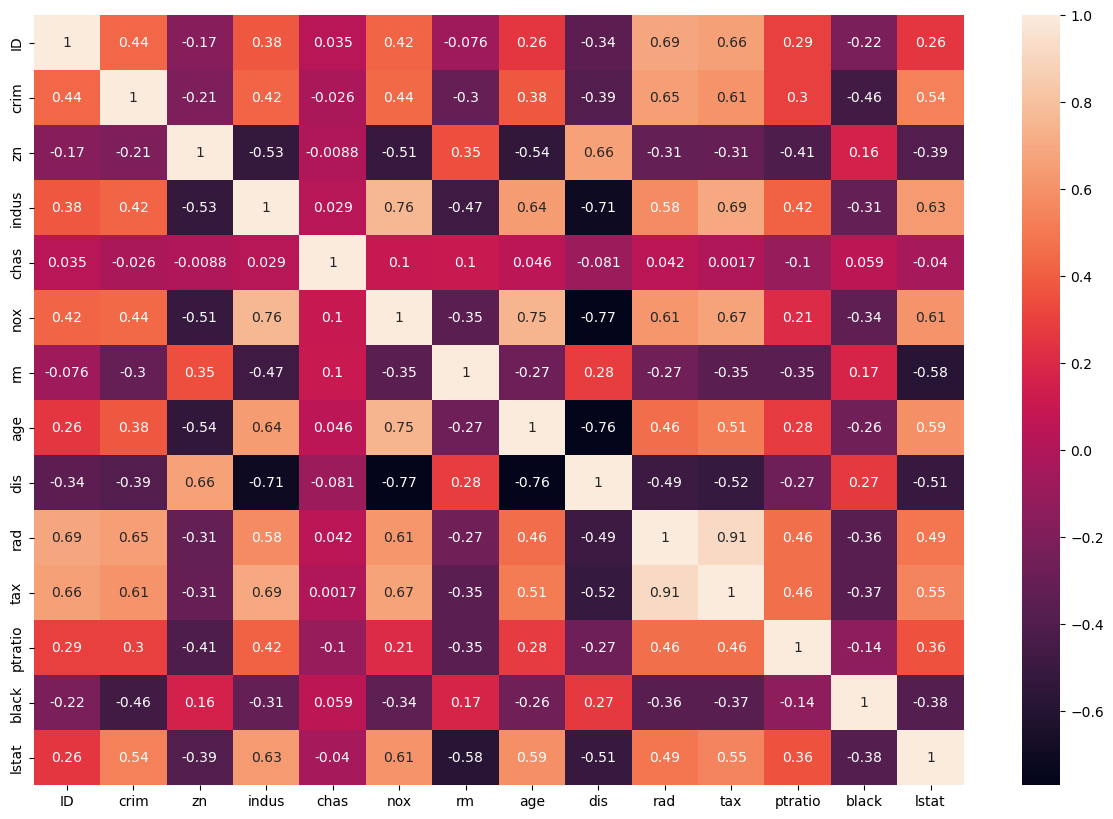

In [523]:
plt.figure(figsize = (15,10))
sns.heatmap(X_train.corr(), annot= True)

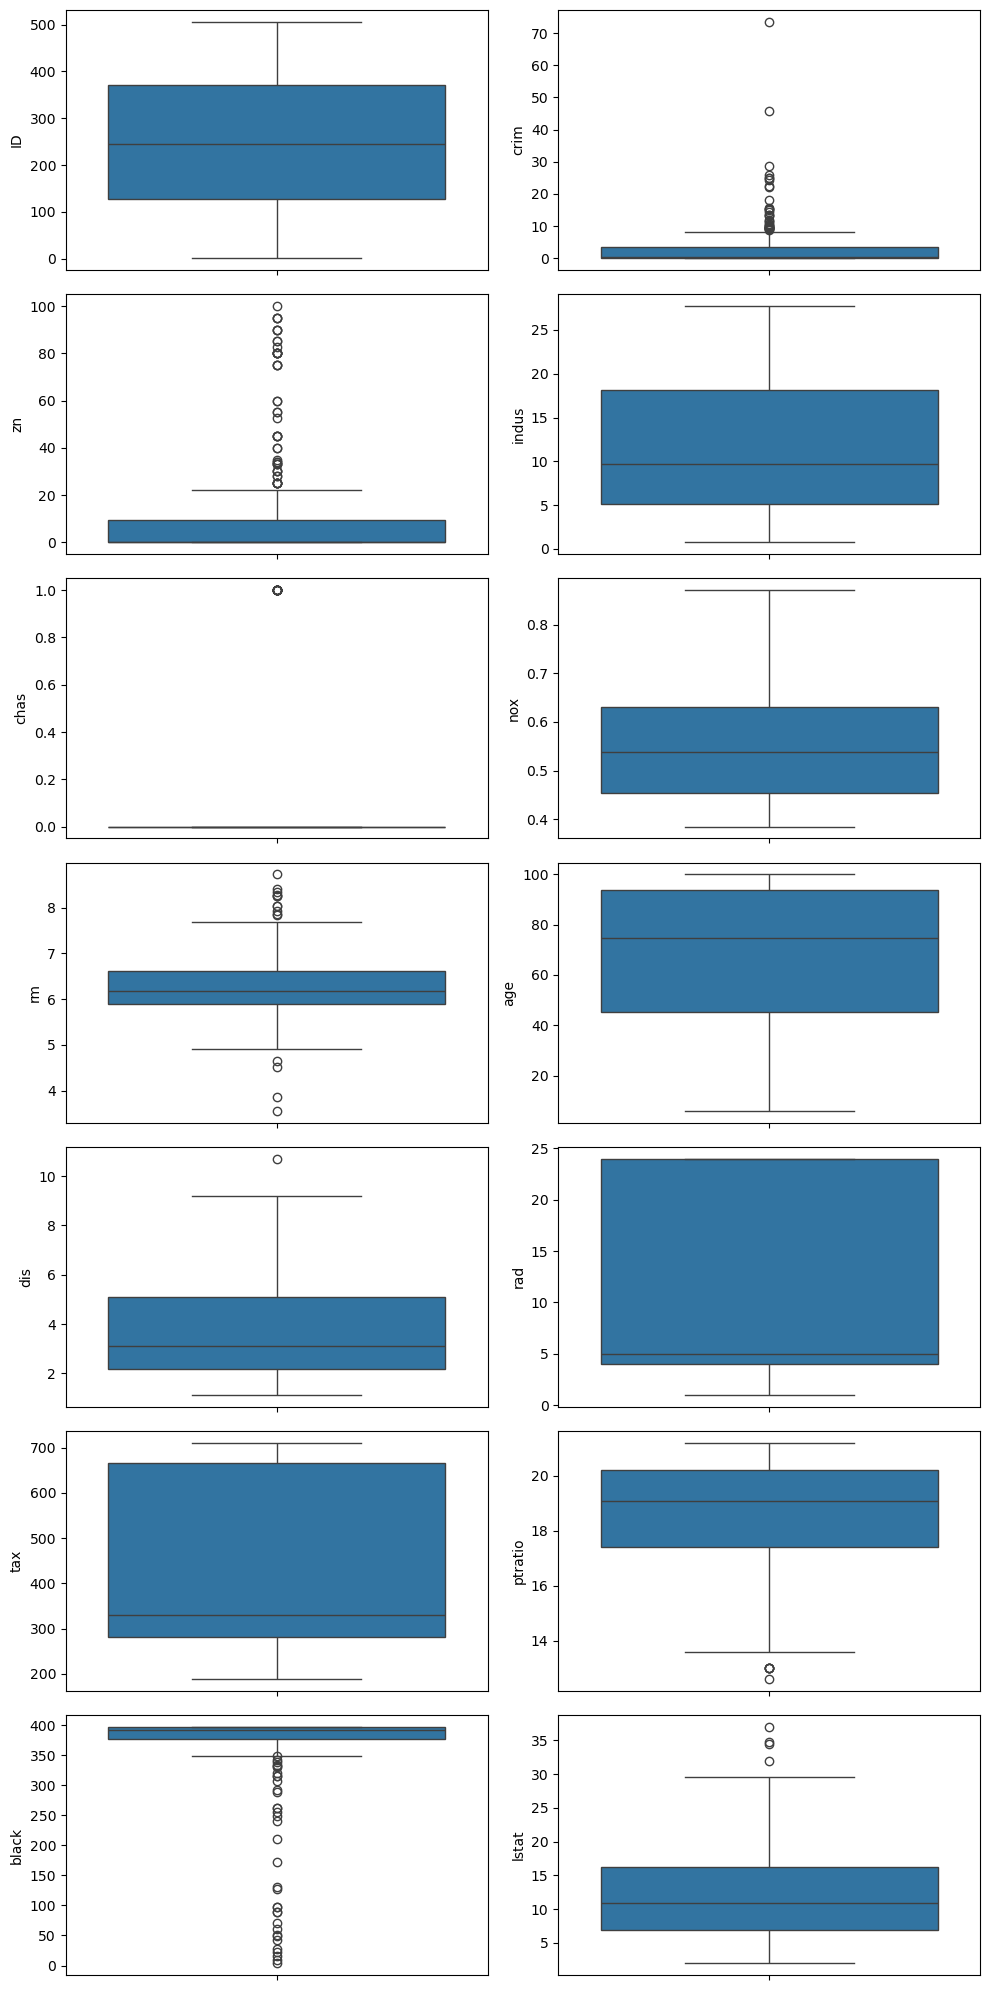

In [524]:
# Box-plots for visualizing outlier 
fig, axs = plt.subplots(nrows=7,ncols=2,figsize=(10,20))
index = 0
axs = axs.flatten()
for k,v in X_train.items():
    sns.boxplot(y=k,data=X_train,ax=axs[index])
    index+=1
plt.tight_layout()

In [525]:
# 1. Outlier Removal using Z-scores
z_scores = np.abs(stats.zscore(X_train))  # Z-scores on raw data
outliers = (z_scores > 6).any(axis=1)

In [526]:
# Remove outliers from both X_train and y_train
X_train_clean = X_train[~outliers]
y_train_clean = y_train[~outliers]

print("After outlier removal, X_train_clean shape:", X_train_clean.shape)

After outlier removal, X_train_clean shape: (265, 14)


In [527]:
# 2. Feature Engineering (Polynomial Features)
poly = PolynomialFeatures(degree=1, include_bias=False)
X_train_poly = poly.fit_transform(X_train_clean)
X_val_poly = poly.transform(X_val)

In [528]:
# 3. Train Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_poly, y_train_clean)

LinearRegression()

In [529]:
# Predicting the validation set results
y_pred_linear = linear_regressor.predict(X_val_poly)

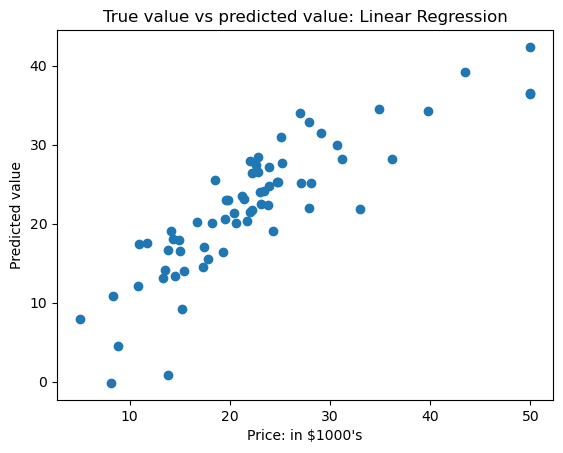

In [530]:
# Plotting true vs predicted values
plt.scatter(y_val, y_pred_linear)
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value: Linear Regression")
plt.show()

In [531]:
# Calculate RMSE
rmse_linear = np.sqrt(mean_squared_error(y_val, y_pred_linear))
print("Root Mean Square Error (Linear Regression):", rmse_linear)

Root Mean Square Error (Linear Regression): 4.840968576363809


In [532]:
# 4. Predict the test set results (after polynomial transformation)
# Verify the columns in the test set
print("Test set columns:", test_df.columns)

Test set columns: Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')


In [533]:
# Drop 'ID' column if it exists and align test set columns with training set columns
if 'ID' in test_df.columns:
    X_test = test_df.drop('ID', axis=1)
else:
    X_test = test_df.copy()  # If 'ID' does not exist, use the whole DataFrame

In [534]:
# Ensure the test set has the same columns as the training set
X_val = X_val[X_train.columns]

In [535]:
# Apply polynomial transformation to the test set
X_test_poly = poly.transform(X_val)

In [536]:
# Output test predictions
if 'ID' in test_df.columns:
    for x, y in zip(test_df['ID'], y_test_pred):
        print(x, y, sep='\t\t')
else:
    print("No ID column present in test set.")

3		30.694675743960246
6		25.674399982248097
8		17.456287222588532
9		8.348672821814048
10		17.055693994441526
18		17.278619185435605
20		19.616594559958973
25		15.595046950313108
26		13.634321792278705
27		15.553299785140556
29		19.586915432056887
30		21.142665299319752
33		7.961980362798414
34		14.298182908825105
36		24.92717253571232
37		23.416895315415545
38		24.544245868271393
42		28.756572960427253
49		5.930444103693951
53		27.880118970136067
60		21.80510497232629
63		24.320362740459547
70		20.86481793652306
72		22.107019187715448
79		20.636270837317422
80		22.765351961280167
83		26.915053237835956
92		27.681078453257577
93		29.42581386140563
96		29.03123076565364
98		35.52627081965138
99		35.64321093071554
100		32.24058473781594
105		22.073867851448803
106		18.852090249704624
111		21.588393335154116
113		20.43086599829751
114		20.082004268824274
116		20.212340326970498
126		21.850721528392693
130		13.84817687846149
131		19.994795257606334
133		20.16964883457572
136		16.7791240331